EE21S061 Arihant Jain Lab 2 for EE5175 course:



In [2]:
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install sympy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


Setting up Libraries as needed using sympy for Matrix object in the code.

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [18, 7] 

Setting up a figure size and also matplot inline to view images in notebook.

In [4]:
from PIL import Image
from numpy import asarray

# load the image
img_1 = Image.open('IMG1.png')
img_2 = Image.open('IMG2.png')


In [5]:
import math
import numpy as np

Using the same Bilinear Function created in Lab_1

In [6]:
def bilin(xs,ys):
        #This function takes fraction co-ordinate for source image based on target to source matrix and then uses bilinear interpolation to calculated the value of the given target co-ordinate
        xs_f=math.floor(xs)
        ys_f=math.floor(ys)
        a=ys-ys_f
        b=xs-xs_f
        #Above we calculate all necessary values to perform bilinear interpolation
        if (xs<0 or ys<0 or xs>data.shape[0]-1 or ys>data.shape[1]-1):
            #to account for the fact that this function may sometimes receive invalid co-ordinate such as negative or beyond image dimensions
            return False
        return (((1-a)*(1-b)*data[xs_f][ys_f])+
                ((a)*(1-b)*data[xs_f+1][ys_f])+
                ((1-a)*(b)*data[xs_f][ys_f+1])+
                ((a)*(b)*data[xs_f+1][ys_f+1]))

Reading up Stats of the image we will be working on.

In [7]:
data = asarray(img_1)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(296, 512)
Number of Pixels 151552


In [8]:
data = asarray(img_2)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
print("Number of Pixels",data.shape[0]*data.shape[1])

<class 'numpy.ndarray'>
(517, 598)
Number of Pixels 309166


Here we can see that both images have different dimension and different number of pixels but given we have point correspondence we can find a transform which takes us from one to another

In [9]:
figure, axis = plt.subplots(1, 2)
axis[0].imshow(img_1,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(img_2,cmap="gray")
axis[1].set_title('IMG2')

Text(0.5, 1.0, 'IMG2')

Looking at them we can see a lot of pixels in IMG_2 are just 0 and shows up as black section around the rotated image.

#### 1. Transform from IMG_1 to IMG_2 space.

We are given in the question that 2 images are related by a in-plane rotation and in-plane translation so.
we get,

$$n=\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix},
a=\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix},
S=\begin{bmatrix} 0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

This is for Clockwise rotation around the camera origin Computing Rotation Matrix on this leads to

$$R=\begin{bmatrix} \cos(\theta) & \sin(\theta) & 0 \\ -\sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

and Translation Matrix for in-plane translation would be 

$$T=\begin{bmatrix} T_x \\ T_y \\ 0  \end{bmatrix}$$

We know Homography of image can be written as :

$$H=R+\frac{1}{d} T n^T $$

Computing H based on R and T we get.

$$H=\begin{bmatrix} \cos(\theta) & \sin(\theta) & \frac{T_x}{d} \\ -\sin(\theta) & \cos(\theta) & \frac {T_y}{d} \\ 0 & 0 & 1 \end{bmatrix}$$

Lets assume 
$$a=\frac{T_x}{d},b=\frac{T_y}{d},c=\cos(\theta),d=\sin(\theta)$$

This means if we apply H on IMG_1 $(x_s,y_s)$ we get IMG_2 $(x_t,y_t)$ 

$$\begin{bmatrix} x_t \\ y_t \\ 1\end{bmatrix}=\begin{bmatrix} c & d & a \\ -d & c & b \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x_s \\ y_s \\ 1\end{bmatrix}$$

Solving for Equation in x_t,y_t,x_s,y_s we get.

$$\begin{bmatrix} 1 & 0 & x_s & y_s & -x_t \\ 0 & 1 & y_s & -x_s & -y_t \end{bmatrix} \begin{bmatrix} a \\ b \\ c \\ d \\ 1 \end{bmatrix} = \underline{0}$$

This is similar to :

$$ A . h = \underline{0}$$


Now we can solve for null space for A as it would give us solution for h which then can be plugged in the H matrix to figure out the Homography.

In [10]:
IMG_1_points=[(29,124),(157,372)]
IMG_2_points=[(93,248),(328,399)]
#Creating the A matrix which we will solve to find Homography for the given point correspondence
a=np.empty((0,5))
for i in range(len(IMG_1_points)):
    a = np.append(a, np.array([[1,0,IMG_1_points[i][0],IMG_1_points[i][1],-IMG_2_points[i][0]]]), axis=0)
    a = np.append(a, np.array([[0,1,IMG_1_points[i][1],-IMG_1_points[i][0],-IMG_2_points[i][1]]]), axis=0)
#Creating numpy array to store A after this we will use sympy to solve for null space of this matrix

Given we have 4 unknown we need atleast 2 points to solve for h which we have.

In [11]:
from sympy import * 
A=Matrix(a)
temp=A.nullspace()
#temp is null matrix for A
a=temp[0][0]
b=temp[0][1]
c=temp[0][2]
d=temp[0][3]
# this assignment is based on the above equations

h = np.array([[c,d,a ], 
              [-d,c,b],
              [0,0,1]])
H=Matrix(h)

we assumed
$$a=\frac{T_x}{d},b=\frac{T_y}{d},c=\cos(\theta),d=\sin(\theta)$$

using Matrix object from sympy i put in the matrix A and calculated h and restructure it into H matrix. now this matrix can be used for our purpose to transform between IMG_1 and IMG_2

In [12]:
H

Matrix([
[ 0.866988496302383, 0.500102711585867,  5.8445973705834],
[-0.500102711585867, 0.866988496302383, 154.996405094495],
[                 0,                 0,                1]])

We can see what value we got for H 

In [13]:
data = asarray(img_1)
data2 = asarray(img_2)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
#again we open the image but this time we iterate through the target co-ordinates


data3=np.zeros((517, 598))
for xs in range(data.shape[0]):
    for ys in range(data.shape[1]):
        x_t=np.matmul(H,np.array([[xs],[ys],[1]]))
        #Matrix Multiplication between Homography and source co-ordinates
        if not ((math.floor(x_t[0])>data3.shape[0]-1) or (math.floor(x_t[1])>data3.shape[1]-1)):
            data3[math.floor(x_t[0])][math.floor(x_t[1])]=data[xs][ys]
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('IMG_1 Computed')
#setting up a 1*3 to show IMG_1,IMG_2 and IMG_1 Computed

<class 'numpy.ndarray'>
(296, 512)
<class 'numpy.ndarray'>
(517, 598)


Text(0.5, 1.0, 'IMG_1 Computed')

Tried source to target mapping to see our result of Homography matrix we can see that IMG_1 now is in space of IMG_2 but as we saw previouly float and ceil are not great for quality

<class 'numpy.ndarray'>
(296, 512)
<class 'numpy.ndarray'>
(517, 598)


Text(0.5, 1.0, 'IMG1 interpolated')

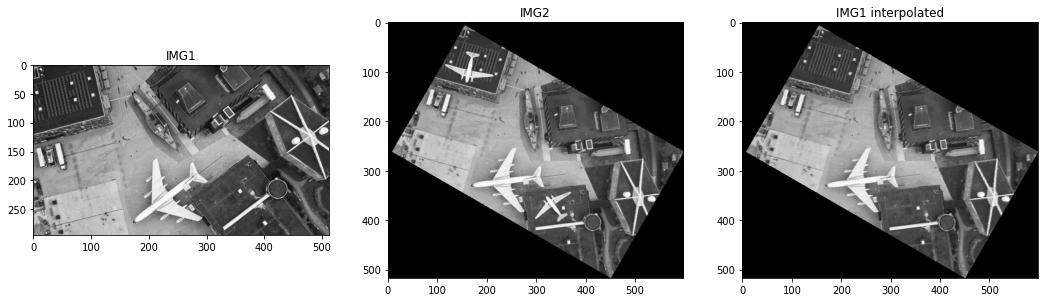

In [14]:
data = asarray(img_1)
data2 = asarray(img_2)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
#again we open the image but this time we iterate through the target co-ordinates
H=np.float_(H)
H_i=np.linalg.inv(H)

data3=np.zeros((517, 598))
for xt in range(data3.shape[0]):
    for yt in range(data3.shape[1]):
        x_s=np.matmul(H_i,np.array([[xt],[yt],[1]]))
        temp=bilin(x_s[0],x_s[1])
        if (temp):
            data3[xt][yt]=temp

        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('IMG1 interpolated')

As expected bilinear gives better result which we can now work on to find changes between the 2 images.

Bilinear interpolation has averaged pixels in its 4 pixel range which means although are eyes can't see it there are difference in pixel values between the 2 images which are not exactly changes so to take care of that I have added a variable called threshold it look for significant change in pixel value accross the 2 images.

Changing threshold lets us set sensitivity of change we are looking for i have currently set it 100 but it can be changed to look for more sensitive changes.

In [15]:
data4=np.zeros((517, 598))
#Creating a empty image to highlight change detected on 
threshold=100
#setting a threshold value 
for i in range(data4.shape[0]):
    for j in range(data4.shape[1]):
        if (threshold<data2[i][j]-data3[i][j]) or (-threshold>data2[i][j]-data3[i][j]):
            #comparing against threshold and putting a pixel value of 200 in that pixel if change is detected
            data4[i][j]=200
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
image4 = Image.fromarray(data4)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image2,cmap="gray")
axis[0].set_title('IMG2')
axis[1].imshow(image3,cmap="gray")
axis[1].set_title('IMG1 Interpolated')
axis[2].imshow(image4,cmap="gray")
axis[2].set_title('Change Detected')

Text(0.5, 1.0, 'Change Detected')

We can see that most highlighted object final image is the 2 plane on top and bottom section of the image and this is a good result and we can also see out some outline can be seen of the building and near by structure because of the reason mentioned before we can look for more changes if we reduce the threshold.

But lets try going from IMG_2 space to IMG_1

#### 2 Transform from IMG_2 to IMG_1 space.

We will be computing Homography matrix again for this transformation.

In [16]:
IMG_2_points=[(29,124),(157,372)]
IMG_1_points=[(93,248),(328,399)]
a=np.empty((0,5))
for i in range(len(IMG_1_points)):
    a = np.append(a, np.array([[1,0,IMG_1_points[i][0],IMG_1_points[i][1],-IMG_2_points[i][0]]]), axis=0)
    a = np.append(a, np.array([[0,1,IMG_1_points[i][1],-IMG_1_points[i][0],-IMG_2_points[i][1]]]), axis=0)

In [17]:
from sympy import * 
A=Matrix(a)
temp=A.nullspace()
a=temp[0][0]
b=temp[0][1]
c=temp[0][2]
d=temp[0][3]

h = np.array([[c,d,a ], 
              [-d,c,b],
              [0,0,1]])
H=Matrix(h)

In [18]:
H

Matrix([
[0.865455104708687, -0.499218209314844,  72.3187911721734],
[0.499218209314844,  0.865455104708687, -137.060159434035],
[                0,                  0,                 1]])

We can see change in H going A to B and then B to A. Rotation matrix component seems to be same just different in rotation direction also translation also changes.

In [19]:
data = asarray(img_2)
data2 = asarray(img_1)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
#again we open the image but this time we iterate through the target co-ordinates


data3=np.zeros((296,512))
for xs in range(data.shape[0]):
    for ys in range(data.shape[1]):
        x_t=np.matmul(H,np.array([[xs],[ys],[1]]))
        if not ((math.floor(x_t[0])>data3.shape[0]-1) or (math.floor(x_t[1])>data3.shape[1]-1)):
            data3[math.floor(x_t[0])][math.floor(x_t[1])]=data[xs][ys]
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('IMG_2 computed')

<class 'numpy.ndarray'>
(517, 598)
<class 'numpy.ndarray'>
(296, 512)


Text(0.5, 1.0, 'IMG_2 computed')

Going through the same process checking Homography in source to target and then using bilinear to improve upon and finally look for changes.

<class 'numpy.ndarray'>
(517, 598)
<class 'numpy.ndarray'>
(296, 512)


Text(0.5, 1.0, 'IMG2 interpolated')

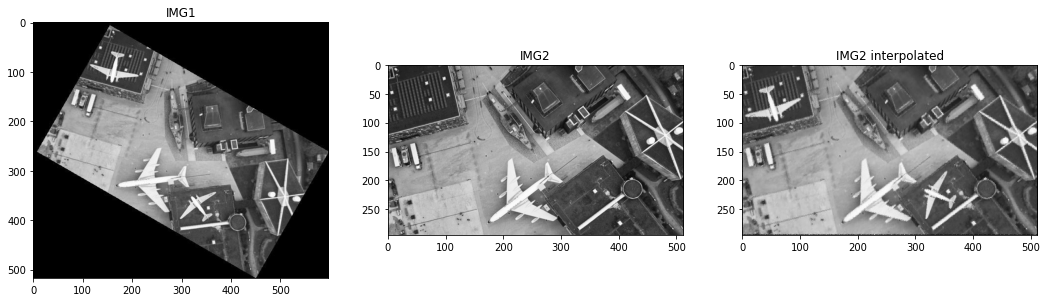

In [20]:
data = asarray(img_2)
data2 = asarray(img_1)
print(type(data))
print(data.shape)
print(type(data2))
print(data2.shape)
H=np.float_(H)
H_i=np.linalg.inv(H)

data3=np.zeros((296,512))
for xt in range(data3.shape[0]):
    for yt in range(data3.shape[1]):
        x_s=np.matmul(H_i,np.array([[xt],[yt],[1]]))
        temp=bilin(x_s[0],x_s[1])
        if (temp):
            data3[xt][yt]=temp

        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('IMG1')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('IMG2')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('IMG2 interpolated')

In [21]:
data4=np.zeros((296,512))
threshold=100
for i in range(data4.shape[0]):
    for j in range(data4.shape[1]):
        if (threshold<data2[i][j]-data3[i][j]) or (-threshold>data2[i][j]-data3[i][j]):
            data4[i][j]=200
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
image4 = Image.fromarray(data4)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image2,cmap="gray")
axis[0].set_title('IMG2')
axis[1].imshow(image3,cmap="gray")
axis[1].set_title('IMG1 Interpolated')
axis[2].imshow(image4,cmap="gray")
axis[2].set_title('Change Detected')

Text(0.5, 1.0, 'Change Detected')

We arrive on the same result as before just that its now in dimension and space of IMG_1. I tried looking for changes with varying threshold and we can try it out here at say 20 threshold.

In [23]:
data4=np.zeros((296,512))
threshold=20
for i in range(data4.shape[0]):
    for j in range(data4.shape[1]):
        if (threshold<data2[i][j]-data3[i][j]) or (-threshold>data2[i][j]-data3[i][j]):
            data4[i][j]=200
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
image4 = Image.fromarray(data4)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image2,cmap="gray")
axis[0].set_title('IMG2')
axis[1].imshow(image3,cmap="gray")
axis[1].set_title('IMG1 Interpolated')
axis[2].imshow(image4,cmap="gray")
axis[2].set_title('Change Detected')

Text(0.5, 1.0, 'Change Detected')

What we can see here is that at lower threshold outlines of object in the image are more prominent.

I think its because of the fact that based on bilinear interpolation every pixel can be influenced by its neighbour and at border of object that pixel is being influenced by 2 different contrast so it changes more than pixel value inside the object and thats why it shows up here at threshold of 20.